# Stock Data Analysis
Stock data used : 'Mangalore Refinery and Petrochemicals Limited'

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn.linear_model
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.tree
import sklearn.svm
import sklearn.neighbors
import sklearn.naive_bayes
import sklearn.ensemble

In [2]:
#Reading MRPL.csv to stock.df
stock_df = pd.read_csv('MRPL.csv')
print("data frame 'stock_df' shape:", stock_df.shape)

data frame 'stock_df' shape: (494, 15)


In [3]:
stock_df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,MRPL,EQ,15-May-2017,129.0,131.35,135.45,131.20,134.00,134.2,133.31,1866640,2.488348e+08,16937,524064,28.08
1,MRPL,EQ,16-May-2017,134.2,133.20,134.60,130.55,131.80,131.7,132.02,891972,1.177617e+08,8787,322721,36.18
2,MRPL,EQ,17-May-2017,131.7,131.25,136.35,131.25,134.50,135.1,134.39,4107759,5.520435e+08,23368,1760745,42.86
3,MRPL,EQ,18-May-2017,135.1,139.70,142.80,135.00,135.95,136.1,139.44,10309477,1.437569e+09,63863,2073114,20.11
4,MRPL,EQ,19-May-2017,136.1,139.00,139.00,132.15,133.60,133.6,135.85,2148214,2.918424e+08,19220,660925,30.77


In [4]:
stock_df.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,4.940000e+02,494.000000,4.940000e+02,494.000000
mean,100.733198,100.856073,102.506883,98.969028,100.598279,100.598684,100.720283,1.671633e+06,1.754654e+08,10796.793522,5.278960e+05,31.837530
std,24.966492,25.043489,25.465997,24.706431,24.991531,24.992883,25.123944,1.695617e+06,2.063811e+08,8315.286436,5.480659e+05,10.859756
min,62.950000,62.600000,63.950000,61.250000,62.900000,62.550000,62.750000,1.982440e+05,2.422019e+07,1653.000000,6.519900e+04,7.210000
25%,74.950000,75.150000,76.462500,73.675000,74.750000,74.912500,74.927500,8.105992e+05,7.178690e+07,5425.250000,2.215488e+05,24.392500
50%,105.475000,105.000000,106.825000,103.975000,105.500000,105.400000,105.155000,1.219812e+06,1.219739e+08,8517.500000,3.545810e+05,30.740000
75%,125.312500,125.575000,127.287500,123.000000,124.987500,125.187500,125.465000,1.886615e+06,1.969181e+08,12661.250000,6.283235e+05,39.292500
max,142.350000,145.000000,146.700000,139.450000,143.450000,142.350000,141.770000,2.265075e+07,2.743207e+09,65936.000000,5.230786e+06,70.540000


In [5]:
#removing rows with 'Series' not equal to 'EQ' Category
stock_df = stock_df[stock_df.Series == 'EQ']

In [6]:
#min, max, mean Close Price over last 90 days
print("Price in the last 90 days:")
stock_df.tail(90).agg({'Close Price': ['min', 'max', 'mean']})

Price in the last 90 days:


,Close Price
min,62.550000
max,75.500000
mean,69.488889


In [7]:
#Convert Date dtype to datetime64[ns]
stock_df = stock_df.astype({'Date': 'datetime64[ns]'})
stock_df.dtypes

Symbol                            object
Series                            object
Date                      datetime64[ns]
Prev Close                       float64
Open Price                       float64
High Price                       float64
Low Price                        float64
Last Price                       float64
Close Price                      float64
Average Price                    float64
Total Traded Quantity              int64
Turnover                         float64
No. of Trades                      int64
Deliverable Qty                    int64
% Dly Qt to Traded Qty           float64
dtype: object

In [8]:
#Retrieve Year and Month from Date
stock_df['Year'] = pd.DatetimeIndex(stock_df['Date']).year
stock_df['Month'] = pd.DatetimeIndex(stock_df['Date']).month

In [9]:
#Adding VWAP column
stock_df = stock_df.assign(VWAP=stock_df.eval('wgtd = `Close Price` * `Total Traded Quantity`', inplace=False).groupby(['Year', 'Month']).cumsum().eval('wgtd / `Total Traded Quantity`'))

In [10]:
#Average Close Price over last N days
def avg_last_n(df, n):
    return df['Close Price'].tail(n).mean()
#Profit Percent over last n days
def profit_percent_last_n(df, n):
    return (df['Close Price'].tail(n).iloc[-1] - df['Close Price'].tail(n).iloc[0])/df['Close Price'].tail(n).iloc[0]

In [11]:
print("Average Price over past:")
print('1 week:', round(avg_last_n(stock_df, 7), 2))
print('2 weeks:', round(avg_last_n(stock_df, 2*14), 2))
print('1 month:', round(avg_last_n(stock_df, 30), 2))
print('3 months:', round(avg_last_n(stock_df, 3*30), 2))
print('6 months:', round(avg_last_n(stock_df, 365//2), 2))
print('1 year:', round(avg_last_n(stock_df, 365), 2))

print('\n')

print("Profit percent over past:")
print('1 week:', round(profit_percent_last_n(stock_df, 7), 2), '%')
print('2 weeks:', round(profit_percent_last_n(stock_df, 2*14), 2), '%')
print('1 month:', round(profit_percent_last_n(stock_df, 30), 2), '%')
print('3 months:', round(profit_percent_last_n(stock_df, 3*30), 2), '%')
print('6 months:', round(profit_percent_last_n(stock_df, 365//2), 2), '%')
print('1 year:', round(profit_percent_last_n(stock_df, 365), 2), '%')

Average Price over past:
1 week: 66.83
2 weeks: 70.23
1 month: 70.49
3 months: 69.49
6 months: 73.39
1 year: 90.83


Profit percent over past:
1 week: -0.11 %
2 weeks: -0.16 %
1 month: -0.16 %
3 months: -0.17 %
6 months: -0.25 %
1 year: -0.49 %


In [12]:
#Calculating daily percentage change in the stock price (useful later)
Day_Perc_Change = stock_df['Close Price'].pct_change()*100
Day_Perc_Change[0] = 0
stock_df['Day_Perc_Change'] = Day_Perc_Change

In [13]:
#Assigning trend labels according to daily percentage change
def trend_labeler(Day_Perc_Change):
    if -0.5<Day_Perc_Change<0.5:
        label = 'Slight'
    elif 0.5<=Day_Perc_Change<1:
        label = 'Slight positive'
    elif -1<Day_Perc_Change<=-0.5:
        label = 'Slight negative'
    elif 1<=Day_Perc_Change<3:
        label = 'Positive'
    elif -3<Day_Perc_Change<=-1:
        label = 'Negative'
    elif 3<=Day_Perc_Change<7:
        label = 'Among top gainers'
    elif -7<Day_Perc_Change<=-3:
        label = 'Among top losers'
    elif Day_Perc_Change>=7:
        label = 'Bull run'
    elif Day_Perc_Change<=-7:
        label = 'Bear drop'
    return label
stock_df['Trend'] = stock_df['Day_Perc_Change'].map(trend_labeler)

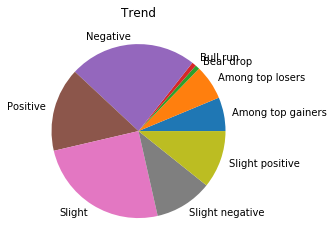

In [14]:
#Pie chart of for the different trends
stock_df.groupby(['Trend']).size().plot(kind = 'pie', title = 'Trend')
plt.ylabel("")
plt.show()

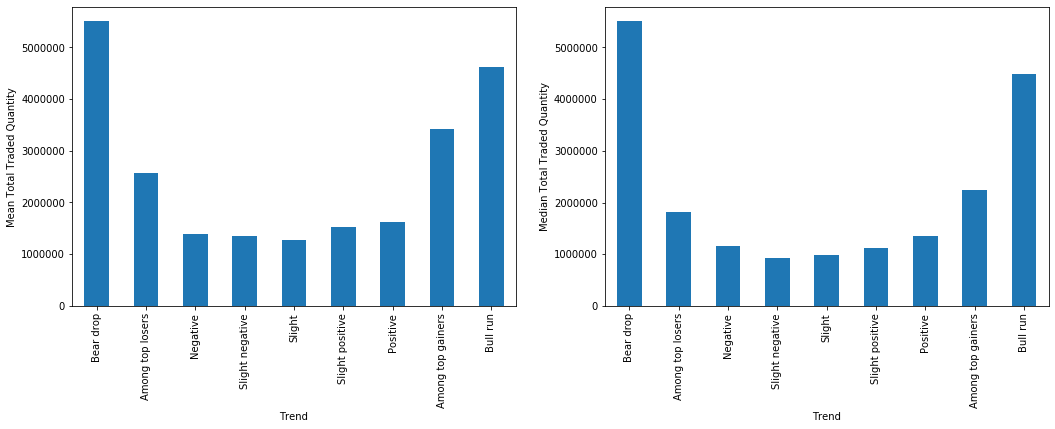

In [15]:
#Bar graphs for number of trades vs the trend
plt.subplot('121')
stock_df.groupby(['Trend'])['Total Traded Quantity'].mean().reindex(['Bear drop', 'Among top losers', 'Negative', 'Slight negative', 'Slight', 'Slight positive', 'Positive', 'Among top gainers', 'Bull run']).plot(kind = 'bar')
plt.ylabel('Mean Total Traded Quantity')
plt.subplot('122')
stock_df.groupby(['Trend'])['Total Traded Quantity'].median().reindex(['Bear drop', 'Among top losers', 'Negative', 'Slight negative', 'Slight', 'Slight positive', 'Positive', 'Among top gainers', 'Bull run']).plot(kind = 'bar')
plt.ylabel('Median Total Traded Quantity')
fig = plt.gcf()
fig.set_size_inches(17.5, 5.5)
plt.show()

In [16]:
stock_df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Perc_Change,Trend
0,MRPL,EQ,2017-05-15,129.0,131.35,135.45,131.20,134.00,134.2,133.31,1866640,2.488348e+08,16937,524064,28.08,2017,5,134.200000,0.000000,Slight
1,MRPL,EQ,2017-05-16,134.2,133.20,134.60,130.55,131.80,131.7,132.02,891972,1.177617e+08,8787,322721,36.18,2017,5,133.391648,-1.862891,Negative
2,MRPL,EQ,2017-05-17,131.7,131.25,136.35,131.25,134.50,135.1,134.39,4107759,5.520435e+08,23368,1760745,42.86,2017,5,134.413658,2.581625,Positive
3,MRPL,EQ,2017-05-18,135.1,139.70,142.80,135.00,135.95,136.1,139.44,10309477,1.437569e+09,63863,2073114,20.11,2017,5,135.425853,0.740192,Slight positive
4,MRPL,EQ,2017-05-19,136.1,139.00,139.00,132.15,133.60,133.6,135.85,2148214,2.918424e+08,19220,660925,30.77,2017,5,135.222877,-1.836885,Negative


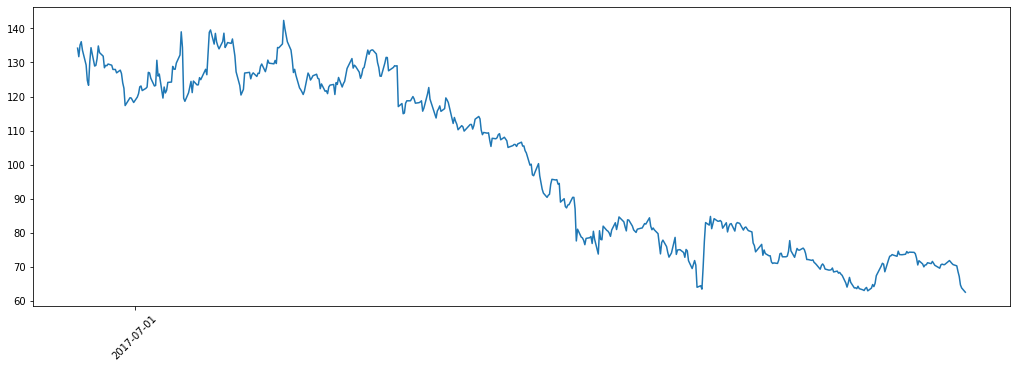

In [17]:
#Visualizing the trend of the stock price
ax = plt.subplot(1, 1, 1)
ax.plot(stock_df.Date, stock_df['Close Price'])
plt.xticks(ax.get_xticks()[::25], rotation = 45)
fig = plt.gcf()
fig.set_size_inches(17.5, 5.5)
plt.show()

D:\Programs\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


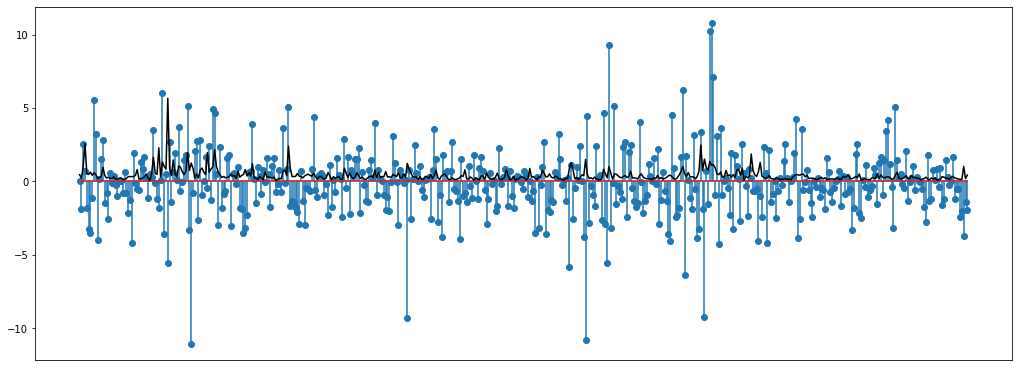

In [18]:
#Visualizing daily percentage change in the stock price along with trades
ax = plt.subplot(1, 1, 1)
ax.stem(stock_df.index, stock_df['Day_Perc_Change'])
ax.plot(stock_df.index, stock_df['Total Traded Quantity']/4e6, color = "k")
plt.xticks(ax.get_xticks()[::25], rotation = 45)
fig = plt.gcf()
fig.set_size_inches(17.5, 6.5)
plt.show()

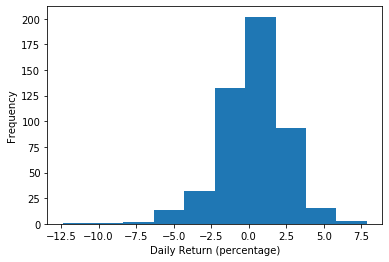

In [19]:
#Histogram of daily returns
((stock_df['Open Price'] - stock_df['Close Price'])/stock_df['Open Price']*100).plot(kind = 'hist')
plt.xlabel('Daily Return (percentage)')
plt.show()

## Comparizon with stocks of other companies

In [22]:
#Loading other stocks
stocks_a_names = ['MRPL.csv', 'JUBLFOOD.csv', 'DHFL.csv', 'ADANIPOWER.csv', 'JINDALSTEL.csv']
stocks_a = list(map(pd.read_csv, stocks_a_names))
stocks_a = [stk[stk['Series'] == 'EQ'].reset_index() for stk in stocks_a]

In [23]:
#Stock Prices of these stocks
stocks_a_CP = pd.DataFrame(columns = stocks_a_names)
for (name, stk) in zip(stocks_a_names, [stk['Close Price'] for stk in stocks_a]):
    stocks_a_CP[name] = stk
stocks_a_CP.head()

,MRPL.csv,JUBLFOOD.csv,DHFL.csv,ADANIPOWER.csv,JINDALSTEL.csv
0,134.2,1025.45,431.40,30.25,114.20
1,131.7,1050.65,424.45,32.85,114.10
2,135.1,1049.05,429.00,33.10,116.40
3,136.1,1019.35,417.95,31.90,113.30
4,133.6,1018.10,404.20,32.40,112.15


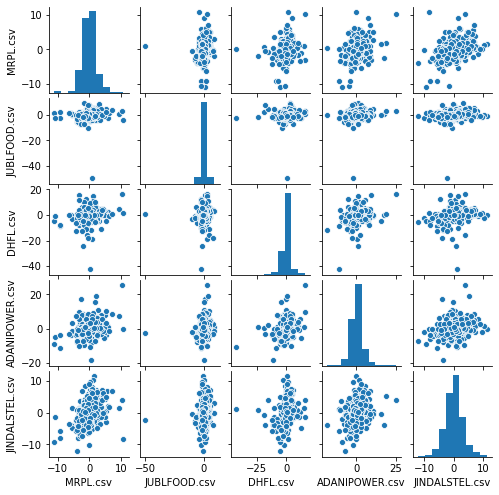

In [24]:
#Correlation between stock prices of these stocks
stocks_a_CP_change = pd.DataFrame(columns = stocks_a_names)
for name in stocks_a_names:
    stocks_a_CP_change[name] = stocks_a_CP[name].pct_change()*100
stocks_a_CP_change.drop(0, inplace = True)

sns.pairplot(stocks_a_CP_change)
fig = plt.gcf()
fig.set_size_inches(6.5, 6.5)
plt.show()

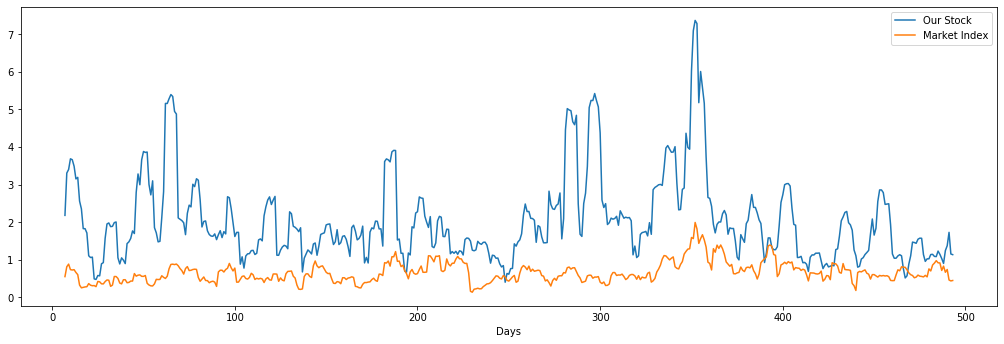

In [25]:
#Variation in stock as compared to a market index (Nifty50)
stocks_a_CP_change['MRPL.csv'].rolling(7).std().plot()
(pd.read_csv('Nifty50.csv')['Close'].pct_change()[1:]*100).rolling(7).std().plot()
plt.xlabel('Days')
plt.legend(['Our Stock', 'Market Index'])
fig = plt.gcf()
fig.set_size_inches(17.5, 5.5)
plt.show()

Our stock (MRPL) varies more than the market. It is therefore riskier but at the same time may provide higher return potential.

## Buy vs Sell Call according to Moving Averages
This trading strategy makes use of Simple Moving Averages accross different period lengths (ie the current trends) to make buy or sell calls

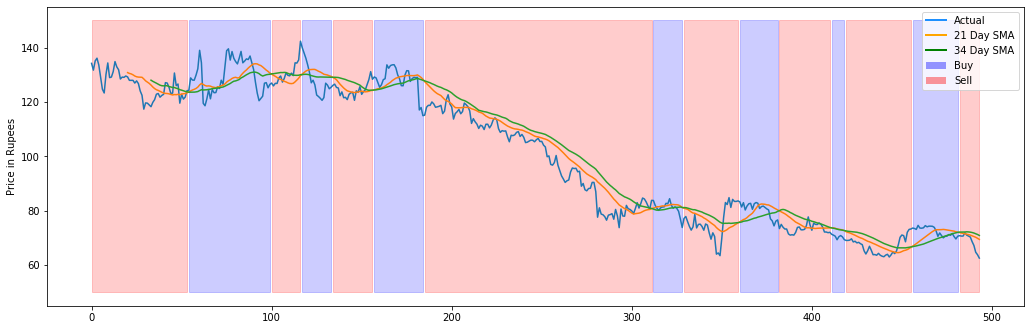

In [26]:
#Buy vs Sell Call
buy_bool = np.array(list(map(int, stock_df['Close Price'].rolling(21).mean()>stock_df['Close Price'].rolling(34).mean())))
stock_df['Close Price'].plot()
stock_df['Close Price'].rolling(21).mean().plot()
stock_df['Close Price'].rolling(34).mean().plot()
plt.fill_between(np.array(stock_df.index), 50, 150, where=buy_bool, color = 'b', alpha=0.2)
plt.fill_between(np.array(stock_df.index), 50, 150, where=(1 - buy_bool), color = 'r', alpha=0.2)
plt.ylabel('Price in Rupees')
plt.legend(['Actual', '21 Day SMA', '34 Day SMA'])
plt.legend(handles = [mpl.lines.Line2D([0], [0], color='dodgerblue', lw=2, label='Actual'), mpl.lines.Line2D([0], [0], color='orange', lw=2, label='21 Day SMA'), mpl.lines.Line2D([0], [0], color='g', lw=2, label='34 Day SMA'), mpl.patches.Patch(facecolor='b', label='Buy', alpha = 0.4), mpl.patches.Patch(facecolor='r', label='Sell', alpha = 0.4)])
fig = plt.gcf()
fig.set_size_inches(17.5, 5.5)
plt.show()

## CAPM value analysis and Beta value
Beta value is used to measure the stock's variability as compared to the market. It is calculated using Linear Regression on the return values of the stock and the market.
Inference from beta values: <br>
$0<\beta<1 \rightarrow$ Less Risk a.c.t Market<br>
$\beta=0 \rightarrow$ Stationary<br>
$\beta=1 \rightarrow$ Market<br>
$\beta>1 \rightarrow$ More riskier than Market<br>
$\beta<0 \rightarrow$ Opposite to Market<br>


#### Daily Calculated 

𝛼: -0.22448884062335192
𝛽: 1.1459975748625344


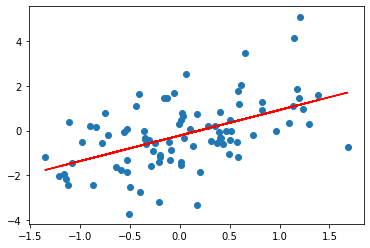

In [27]:
#Load market index
Nifty50 = pd.read_csv('Nifty50.csv')
Nifty50.astype({'Date': 'datetime64[ns]'})
Nifty50['Year'] = pd.DatetimeIndex(Nifty50['Date']).year
Nifty50['Month'] = pd.DatetimeIndex(Nifty50['Date']).month

#find monthly returns
stock_returns_daily = stock_df['Day_Perc_Change'].tail(3*30).to_numpy().reshape(-1, 1)
market_returns_daily = (Nifty50['Close'].pct_change()*100).tail(3*30).to_numpy().reshape(-1, 1)

#fit data
stock_returns_daily_linearmodel = sklearn.linear_model.LinearRegression()
stock_returns_daily_linearmodel.fit(market_returns_daily, stock_returns_daily)

#calculate 𝛼 and 𝛽
print("𝛼:", stock_returns_daily_linearmodel.intercept_[0])
print("𝛽:", stock_returns_daily_linearmodel.coef_[0, 0])
plt.scatter(market_returns_daily, stock_returns_daily)
plt.plot(market_returns_daily, stock_returns_daily_linearmodel.predict(market_returns_daily), color='r')
plt.show()

#### Monthly Calculated 

𝛼: -3.3461726057255645
𝛽: 1.863641019057007


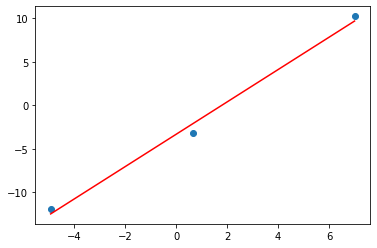

In [28]:
#calculate monthly returns
def calc_return_period(df):
    return (df.iloc[-1]/df.iloc[0] - 1)*100
stock_returns_monthly = stock_df.groupby(['Year', 'Month'])['Close Price'].apply(calc_return_period).to_numpy().reshape(-1, 1)
market_returns_monthly = Nifty50.groupby(['Year', 'Month'])['Close'].apply(calc_return_period).to_numpy().reshape(-1, 1)

#fit monthly return over last three months
stock_returns_monthly_linearmodel = sklearn.linear_model.LinearRegression()
stock_returns_monthly_linearmodel.fit(market_returns_monthly[-3:], stock_returns_monthly[-3:])

#calculate 𝛼 and 𝛽
print("𝛼:", stock_returns_monthly_linearmodel.intercept_[0])
print("𝛽:", stock_returns_monthly_linearmodel.coef_[0, 0])
plt.scatter(market_returns_monthly[-3:], stock_returns_monthly[-3:])
plt.plot(market_returns_monthly[-3:], stock_returns_monthly_linearmodel.predict(market_returns_monthly[-3:]), color='r')
plt.show()

As the $\beta$ value was a little more than one the stock is a bit more riskier than the market. i.e. it is more volatile.

## Bollinger Bands
These are also useful tools in predicting the right actions

In [29]:
stock_df['Bollinger Middle'] = stock_df['Close Price'].rolling(14).mean()
stock_df['Bollinger Lower'] = (stock_df['Close Price'].rolling(14).mean() - 2*stock_df['Close Price'].rolling(14).std())
stock_df['Bollinger Upper'] = (stock_df['Close Price'].rolling(14).mean() + 2*stock_df['Close Price'].rolling(14).std())
stock_df.loc[:12, ['Bollinger Middle', 'Bollinger Lower', 'Bollinger Upper']] = 0

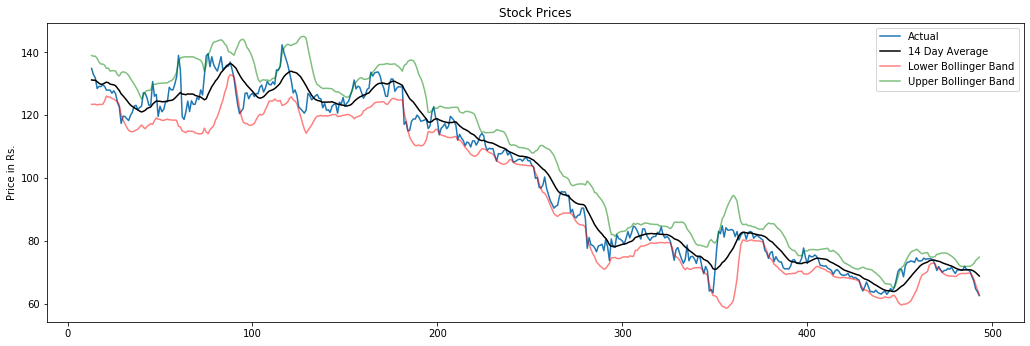

In [30]:
#Bollinger Bands
stock_df['Close Price'][13:].plot()
stock_df['Bollinger Middle'][13:].plot(color = 'k')
stock_df['Bollinger Lower'][13:].plot(color = 'red', alpha = 0.5)
stock_df['Bollinger Upper'][13:].plot(color = 'green', alpha = 0.5)
plt.ylabel('Price in Rs.')
plt.legend(['Actual', '14 Day Average', 'Lower Bollinger Band', 'Upper Bollinger Band'])
plt.title('Stock Prices')
fig = plt.gcf()
fig.set_size_inches(17.5, 5.5)
plt.show()

In [31]:
#predicting calls using bollinger bands
X = stock_df.loc[13:, ['Close Price', 'Bollinger Lower', 'Bollinger Middle', 'Bollinger Upper']].to_numpy()
y = stock_df.loc[13:, ['Call']].T.squeeze().map({'Buy': 0, 'Hold Buy/ Liquidate Short':1, 'Hold Short/ Liquidate Buy':2, 'Short':3}).to_numpy().reshape(-1, 1)
print(X.shape)
print(y.shape)
print()

call_classifiers = {
    'Decision Tree': sklearn.tree.DecisionTreeClassifier(max_depth = 3),
    'SVM Linear': sklearn.svm.SVC(kernel = 'linear', C = 1),
    'K-Neighbors': sklearn.neighbors.KNeighborsClassifier(n_neighbors = 7),
    'Gaussian Naive Bayes': sklearn.naive_bayes.GaussianNB()
}

print('Cross Validation Scores:')
for name, clf in call_classifiers.items():
    print(name, ':', sum(sklearn.model_selection.cross_val_score(clf, X, y.ravel(), cv = 5))*100/5, "%")

(481, 4)
(481, 1)

Cross Validation Scores:
Decision Tree : 59.87972508591065 %
SVM Linear : 97.50429553264604 %
K-Neighbors : 57.560137457044675 %
Gaussian Naive Bayes : 49.72508591065291 %
